# This notebook is used to verify the hexapod LUT
## This is for data taken on 2021-08-17 which goes up/down taking data in imaging mode only.
## Notebook finds stars and determines a PSF

In [1]:
import asyncio 
import matplotlib

import numpy as np
import pandas as pd

from matplotlib import pylab as plt
from astropy.time import Time, TimeDelta

from lsst_efd_client import EfdClient, resample, rendezvous_dataframes

%matplotlib inline

In [2]:
efd_client = EfdClient('summit_efd')
#efd_client = EfdClient('ldf_stable_efd') 

### Find data
Query for all the `endReadout` events on the timespan of the night.

In [3]:
date='20210907'
test='M1_motion_monitoring'

In [49]:
run='night2'

if run == 'initial':
    t1_set = Time("2021-09-08T02:00:00", format='isot', scale='tai')
    t2_set = Time("2021-09-08T09:41:44", format='isot', scale='tai')
#     start_log_msg = '[2021-07-08_Repeat_Focus_Test_START]'
#     finish_log_msg = '[2021-07-08_Repeat_Focus_Test_END]'
elif run == 'night2': 
    t1_set = Time("2021-09-09T02:00:00", format='isot', scale='tai')
    t2_set = Time("2021-09-09T09:41:44", format='isot', scale='tai')
else:
    raise IOError('input not valid')

In [50]:
time = Time(Time.now(), format='isot', scale='tai')
print(f'time is {time}')

time is 2021-09-09T07:11:21.278


In [51]:
end_readout = await efd_client.select_time_series("lsst.sal.ATCamera.logevent_endReadout", 
                                           ["imageName", "requestedExposureTime", "additionalKeys",
                                            "additionalValues","timestampAcquisitionStart","timestampEndOfReadout"], t1_set, t2_set)

In [52]:
end_readout

,imageName,requestedExposureTime,additionalKeys,additionalValues,timestampAcquisitionStart,timestampEndOfReadout
2021-09-09 02:04:52.936000+00:00,AT_O_20210908_000166,2.0,groupId:imageType,2021-09-09T02\:04\:43.182:OBJECT,1.631153e+09,1.631153e+09
2021-09-09 02:10:19.007000+00:00,AT_O_20210908_000167,2.0,groupId:imageType,2021-09-09T02\:10\:09.283:OBJECT,1.631153e+09,1.631153e+09
2021-09-09 02:10:54.131000+00:00,AT_O_20210908_000168,2.0,groupId:imageType,2021-09-09T02\:10\:44.410:OBJECT,1.631153e+09,1.631153e+09
2021-09-09 02:11:29.282000+00:00,AT_O_20210908_000169,2.0,groupId:imageType,2021-09-09T02\:11\:19.554:OBJECT,1.631153e+09,1.631153e+09
2021-09-09 02:43:52.029000+00:00,AT_O_20210908_000170,30.0,groupId:imageType,2021-09-09T02\:43\:05.830:OBJECT,1.631155e+09,1.631155e+09
...,...,...,...,...,...,...
2021-09-09 07:08:50.179000+00:00,AT_O_20210908_000584,1.0,groupId:imageType,2021-09-09T07\:08\:46.455:ENGTEST,1.631171e+09,1.631171e+09
2021-09-09 07:09:29.277000+00:00,AT_O_20210908_000585,1.0,groupId:imageType,2021-09-09T07\:09\:25.559:ENGTEST,1.631171e+09,1.631171e+09
2021-09-09 07:09:57.674000+00:00,AT_O_20210908_000586,1.0,groupId:imageType,2021-09-09T07\:09\:53.950:ENGTEST,1.631171e+09,1.631171e+09
2021-09-09 07:10:31.250000+00:00,AT_O_20210908_000587,1.0,groupId:imageType,2021-09-09T07\:10\:27.533:ENGTEST,1.631171e+09,1.631171e+09


In [53]:
# base0 = await efd_client.select_time_series("lsst.sal.Script.logevent_logMessage", 
#                                            ["message","level"], t1_set, t2_set)

In [54]:
# print(base0.to_string())

In [55]:
# Find the start/end sequences and trim the bad ones
# base = base0[(base0.message.str.find(start_log_msg) != -1) | (base0.message.str.find(finish_log_msg) != -1)]

In [56]:
# # Drop false starts
# if run == 'initial':
#     time_reg = '2021-07-09 02:41:02.488000+00:00'
#     ind=base.index.get_loc(time_reg, method='nearest')
#     base.drop(base.index[ind])

In [57]:
(end_readout.additionalValues[0]).split(':')[-1]

'OBJECT'

Now match each entry. For each `i` item with `intra` in the name, there must be an `i+1` with `extra` otherwise it is not a pair. 
A pair also has the same groupID
The image before the pair is an in-focus image.

In [59]:
intra_images = []
extra_images = []
in_focus_images = []
intra_times = []
extra_times = []
in_focus_times = []
intra_exptimes = []
extra_exptimes = []
in_focus_exptimes = []

df=pd.DataFrame()

i = 0
npairs = 0
nmiss = 0

while i < len(end_readout)-1:
    in_focus_20s = end_readout['imageName'][i]
    
#     #skip known bad files
#     # 198 and 199 find different sources...
#     if intra == 'AT_O_20210817_000197' and extra == 'AT_O_20210817_000198':
#         i+=2
#         continue

    imgtype=(end_readout.additionalValues[i]).split(':')[-1]
    if imgtype == "ENGTEST" or imgtype == "OBJECT" and end_readout['requestedExposureTime'][i]>10 :

        df_tmp=pd.DataFrame({
                             'inFocus20s':end_readout['imageName'][i],
                             # Need times during cwfs for telescope position
                             'inFocusExpTime20s':end_readout['requestedExposureTime'][i],
                             'inFocustimestampEndOfReadout':end_readout['timestampEndOfReadout'][i],
                             'intraExtratimestampAcquisitionStart':end_readout['timestampAcquisitionStart'][i],
                             'intraExtratimestampEndOfReadout':end_readout['timestampEndOfReadout'][i],
                             'imgtype':imgtype,        
                            }, index=[end_readout.index[i]])
        df=df.append(df_tmp)

    i+=1


In [60]:
df

,inFocus20s,inFocusExpTime20s,inFocustimestampEndOfReadout,intraExtratimestampAcquisitionStart,intraExtratimestampEndOfReadout,imgtype
2021-09-09 02:43:52.029000+00:00,AT_O_20210908_000170,30.0,1.631155e+09,1.631155e+09,1.631155e+09,OBJECT
2021-09-09 02:44:35.173000+00:00,AT_O_20210908_000171,30.0,1.631155e+09,1.631155e+09,1.631155e+09,OBJECT
2021-09-09 02:45:20.873000+00:00,AT_O_20210908_000172,30.0,1.631156e+09,1.631155e+09,1.631156e+09,OBJECT
2021-09-09 02:46:03.939000+00:00,AT_O_20210908_000173,30.0,1.631156e+09,1.631156e+09,1.631156e+09,OBJECT
2021-09-09 02:46:48.554000+00:00,AT_O_20210908_000174,30.0,1.631156e+09,1.631156e+09,1.631156e+09,OBJECT
...,...,...,...,...,...,...
2021-09-09 07:08:20.442000+00:00,AT_O_20210908_000583,1.0,1.631171e+09,1.631171e+09,1.631171e+09,ENGTEST
2021-09-09 07:08:50.179000+00:00,AT_O_20210908_000584,1.0,1.631171e+09,1.631171e+09,1.631171e+09,ENGTEST
2021-09-09 07:09:29.277000+00:00,AT_O_20210908_000585,1.0,1.631171e+09,1.631171e+09,1.631171e+09,ENGTEST
2021-09-09 07:09:57.674000+00:00,AT_O_20210908_000586,1.0,1.631171e+09,1.631171e+09,1.631171e+09,ENGTEST


In [61]:
# create new dataframe with new values of interest and we'll join them post-facto
df_offsets=pd.DataFrame()
# Populate the data structure from the pairs found above
for i in range(len(df.index)):
    
    # Determine time stamps for searching for metadata
    # include ability to correct for TAI if required, but set to zero for the moment

#    t1 = Time(in_focus_times[i], scale='tai') - TimeDelta(in_focus_exptimes[i], format='sec', scale='tai')
#    t2 = Time(extra_times[i], scale='tai') - TimeDelta(2., format='sec', scale='tai')
    
    # want time during CWFS sensing for telescope position
    t1 = Time(df['intraExtratimestampAcquisitionStart'][i], format='unix_tai')
    t2 = Time(df['intraExtratimestampEndOfReadout'][i],format='unix_tai')
    
    azel = await efd_client.select_time_series("lsst.sal.ATMCS.mount_AzEl_Encoders", 
                                               ["elevationCalculatedAngle99", "azimuthCalculatedAngle99"], t1, t2)
    # mount reporting incorrect timestamp for time_series (high frequency data)
    azel.index=azel.index+pd.tseries.offsets.DateOffset(seconds=-37)
    
    rotator = await efd_client.select_time_series("lsst.sal.ATMCS.mount_Nasmyth_Encoders",
                                                  ["nasmyth2CalculatedAngle99"], t1, t2)
    # mount reporting incorrect timestamp for time_series (high frequency data)
    rotator.index=rotator.index+pd.tseries.offsets.DateOffset(seconds=-37)

    m1_pressure = await efd_client.select_time_series("lsst.sal.ATPneumatics.m1AirPressure",
                                                  ["pressure"], t1, t2)
    
    # want time during long exposure for hexapod position (or basically just not the CWFS data)
    t2_hex = Time(df['inFocustimestampEndOfReadout'][i], format='unix_tai')
    t1_hex = t1-TimeDelta(df['inFocusExpTime20s'][i], format='sec', scale='tai') # this is subtraction, so before endOfReadout event above
    hexapod_vals = await efd_client.select_time_series("lsst.sal.ATHexapod.positionStatus", 
                                       ["reportedPosition0", "reportedPosition1", "reportedPosition2",
                                       "reportedPosition3", "reportedPosition4", "reportedPosition5"], t1_hex , t2_hex)

# For offsets we want to find the offsets between the start of the set and the beginning of the in-focus image, but the end works too
#     cmd_offset = await efd_client.select_time_series("lsst.sal.ATAOS.command_offset",
#                                                  ["u", "v", "w", "x", "y", "z"], offset_start , Time(df['inFocustimestampEndOfReadout'][i], format='unix_tai'))
    
    # to use the dataframe.between_time(), convert astropy Time object, to numpy time object, to pandas time object, and get the datetime.time
#     time1=pd.to_datetime(t1_set.to_datetime()).time()
#     time2=pd.to_datetime((Time(df['inFocustimestampEndOfReadout'][i],format='unix_tai')).to_datetime()).time()

    df_tmp=pd.DataFrame({'rot_pos':np.mean(rotator['nasmyth2CalculatedAngle99']),
                     'el':np.mean(azel['elevationCalculatedAngle99']),
                     'az':np.mean(azel['azimuthCalculatedAngle99']),
                     'x':hexapod_vals['reportedPosition0'].median(),
                     'y':hexapod_vals['reportedPosition1'].median(),
                     'z':hexapod_vals['reportedPosition2'].median(),
                     'u':hexapod_vals['reportedPosition3'].median(),
                     'v':hexapod_vals['reportedPosition4'].median(),
                     'w':hexapod_vals['reportedPosition5'].median(),
                     'm1': np.mean(m1_pressure['pressure']),
#                      'hexXoffset': cmd_offset['x'].sum(),
#                      'hexYoffset': cmd_offset['y'].sum(),
#                      'hexUoffset': cmd_offset['u'].sum(),
#                      'hexVoffset': cmd_offset['v'].sum(),
#                      'hexZoffset': cmd_offset['z'].sum(),
                        },
                     index=[df.index[i]])
    df_offsets=df_offsets.append(df_tmp)

In [62]:
# Join the two dataframes to create a single one
df=df.join(df_offsets, lsuffix='_caller', rsuffix='_other')

In [63]:
df

,inFocus20s,inFocusExpTime20s,inFocustimestampEndOfReadout,intraExtratimestampAcquisitionStart,intraExtratimestampEndOfReadout,imgtype,rot_pos,el,az,x,y,z,u,v,w,m1
2021-09-09 02:43:52.029000+00:00,AT_O_20210908_000170,30.0,1.631155e+09,1.631155e+09,1.631155e+09,OBJECT,-65.405179,32.874230,180.464345,-4.085946,2.287038,-1.180355,0.350000,0.220000,1.424375e-06,55111.075374
2021-09-09 02:44:35.173000+00:00,AT_O_20210908_000171,30.0,1.631155e+09,1.631155e+09,1.631155e+09,OBJECT,-65.591237,32.872791,180.473906,-4.085946,2.287038,-1.180355,0.350000,0.220000,1.424375e-06,55148.056767
2021-09-09 02:45:20.873000+00:00,AT_O_20210908_000172,30.0,1.631156e+09,1.631155e+09,1.631156e+09,OBJECT,-65.788220,32.871238,180.484017,-4.085906,2.287033,-1.199344,0.350001,0.219998,-1.032879e-07,55063.736799
2021-09-09 02:46:03.939000+00:00,AT_O_20210908_000173,30.0,1.631156e+09,1.631156e+09,1.631156e+09,OBJECT,-65.976504,32.869726,180.493678,-4.085906,2.287033,-1.199344,0.350001,0.219998,-1.032879e-07,55047.364164
2021-09-09 02:46:48.554000+00:00,AT_O_20210908_000174,30.0,1.631156e+09,1.631156e+09,1.631156e+09,OBJECT,-66.169157,32.868152,180.503552,-4.085859,2.287036,-1.182334,0.350000,0.220001,1.349883e-06,55089.332865
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-09 07:08:20.442000+00:00,AT_O_20210908_000583,1.0,1.631171e+09,1.631171e+09,1.631171e+09,ENGTEST,-0.365264,76.493683,224.960177,-3.741191,2.248999,-1.274956,0.350002,0.220000,2.008488e-06,117668.354333
2021-09-09 07:08:50.179000+00:00,AT_O_20210908_000584,1.0,1.631171e+09,1.631171e+09,1.631171e+09,ENGTEST,-0.731656,76.431869,225.183148,-3.741191,2.248999,-1.274956,0.350002,0.220000,2.008488e-06,117341.164642
2021-09-09 07:09:29.277000+00:00,AT_O_20210908_000585,1.0,1.631171e+09,1.631171e+09,1.631171e+09,ENGTEST,-0.230772,49.346701,236.278928,-4.030553,2.249001,-1.228659,0.350000,0.220000,-4.343427e-07,85451.216351
2021-09-09 07:09:57.674000+00:00,AT_O_20210908_000586,1.0,1.631171e+09,1.631171e+09,1.631171e+09,ENGTEST,-0.380014,49.275541,236.282843,-4.030553,2.249001,-1.228659,0.350000,0.220000,-4.343427e-07,84340.594967


In [64]:
# out = rendezvous_dataframes(end_readout, cmd_offset, direction='backward', tolerance=pd.Timedelta(days=1))

In [65]:
filename="data/"+date+'_'+test+"_"+run+"_metadata.csv"
df.to_csv(filename)

## Get M1 mirror data and fit a plane

In [66]:
pmd = await efd_client.select_time_series("lsst.sal.PMD.position", ["position0", "position1", "position2", "position3", "position5"], t1_set, t2_set)

In [67]:
# Read in the file (written using code above)
filename="data/"+date+'_'+test+"_"+run+"_metadata.csv"
df3 = pd.read_csv(filename, index_col=0)
df3.index=pd.to_datetime(df3.index)

In [72]:
pmd

""


In [70]:
df4=rendezvous_dataframes(df3, pmd)

TypeError: Cannot change data-type for object array.

In [69]:
position0_offset = (df4.position0[0])
position1_offset = (df4.position1[0])
position2_offset = (df4.position2[0])
position3_offset = (df4.position3[0])
position4_offset = (df4.position5[0])

In [40]:
from scipy import linalg
arr_len = len(df4.position0)
coeff_arr = np.zeros((arr_len,3))
theta_arr = np.zeros((arr_len))
phi_arr = np.zeros((arr_len))
piston_arr = np.zeros((arr_len))
for i in np.arange(arr_len):

    # X, Y, Z - measured from solidmodel
    set2=np.array((  41.0, 468.0, (df4.position2[i]-position2_offset)))
    set3=np.array(( 384.0,-269.0, (df4.position3[i]-position3_offset)))
    set4=np.array((-425.0,-198.0, (df4.position5[i]-position4_offset)))

    # Vector PQ crossed with Vector PR
    normal = np.cross(set3-set2,set4-set2) # gives a,b,c
    #print(f'normal is {normal}')
#     theta_arr[i] = (np.pi/2 + np.arctan2(normal[2],normal[0])) * 206265 # arcsec
#     phi_arr[i] = (np.pi/2 + np.arctan2(normal[2],normal[1])) * 206265   # arcsec
#     piston_arr[i] = normal[2]
    
#     => a * (x - x0) + b * (y - y0) + c * (z - z0) = 0.
# => a * x - a * x0 + b * y - b * y0 + c * z - c * z0 = 0.
# => a * x + b * y + c * z + (- a * x0 - b * y0 - c * z0) = 0. # D is the last terms
    D= -normal[0]*set2[0] - normal[1]*set2[1] - normal[2]*set2[2]  # Constant in plane equation
    # equation 
    
    phi_from_normal = (np.pi/2+np.arctan2(normal[2], normal[1])) * 206265
    theta_from_normal = (np.pi/2+np.arctan2(normal[2], normal[0])) * 206265
    # find z at the origin to represent piston
    Z_origin = -D/normal[2]
    
    # Measure rotation about the Y-axis (perpendicular to elevation)
    # So this is TIP and should result in motion in azimuth
    # get slope by looking at Y=0, X=400
    x_pt=400; y_pt=0
    #Z_at_x_pt= C[0]*x_pt + C[1]*0.0 + C[2]
    Z_at_x_pt= (-D - normal[0]*x_pt - normal[1]*0.0)/normal[2]
    theta = np.arctan2(Z_at_x_pt-Z_origin, x_pt) * 206265 # arcsec
        
    # Measure rotation about the X-axis (aligned to elevation)
    # this is TILT and should result in motion in elevation
    # get slope by looking at Y=0, X=400    
    x_pt=0; y_pt=400
    Z_at_y_pt= (-D - normal[0]*x_pt - normal[1]*y_pt)/normal[2]
    phi = np.arctan2(Z_at_y_pt-Z_origin, y_pt) * 206265 # arcsec

    theta_arr[i] = theta # arcsec
    phi_arr[i] = phi    # arcsec
    piston_arr[i] = Z_origin
    
    print(f'theta_from_normal is {theta_from_normal:0.2f}, phi_from_normal is {phi_from_normal:0.2f}')
    print(f'theta_arr is {theta_arr[i]:0.2f} [arcsec], phi_arr is {phi_arr[i]:0.2f} [arcsec]')
#     if i == 1:
#         break

theta_from_normal is 0.00, phi_from_normal is 0.00
theta_arr is -0.00 [arcsec], phi_arr is -0.00 [arcsec]
theta_from_normal is 0.00, phi_from_normal is 0.00
theta_arr is -0.00 [arcsec], phi_arr is -0.00 [arcsec]
theta_from_normal is 0.00, phi_from_normal is 0.00
theta_arr is -0.00 [arcsec], phi_arr is -0.00 [arcsec]
theta_from_normal is 0.00, phi_from_normal is 0.00
theta_arr is -0.00 [arcsec], phi_arr is -0.00 [arcsec]
theta_from_normal is 0.51, phi_from_normal is -0.04
theta_arr is 0.51 [arcsec], phi_arr is -0.04 [arcsec]
theta_from_normal is 0.51, phi_from_normal is -0.04
theta_arr is 0.51 [arcsec], phi_arr is -0.04 [arcsec]
theta_from_normal is 0.51, phi_from_normal is -0.04
theta_arr is 0.51 [arcsec], phi_arr is -0.04 [arcsec]
theta_from_normal is 0.51, phi_from_normal is -0.04
theta_arr is 0.51 [arcsec], phi_arr is -0.04 [arcsec]
theta_from_normal is -4.15, phi_from_normal is -0.81
theta_arr is -4.15 [arcsec], phi_arr is -0.81 [arcsec]
theta_from_normal is -4.15, phi_from_normal 

In [41]:
df4

,inFocus20s,inFocusExpTime20s,inFocustimestampEndOfReadout,intraExtratimestampAcquisitionStart,intraExtratimestampEndOfReadout,imgtype,rot_pos,el,az,x,...,z,u,v,w,m1,position0,position1,position2,position3,position5
2021-09-08 02:34:47.118000+00:00,AT_O_20210907_000127,20,1.631068e+09,1.631068e+09,1.631068e+09,ENGTEST,9.317489,62.948838,36.949430,-3.891482,...,-2.057170,0.349999,0.220001,8.366214e-07,104162.505463,-0.101,0.094,0.088,0.014,0.939
2021-09-08 02:35:14.619000+00:00,AT_O_20210907_000128,20,1.631069e+09,1.631068e+09,1.631069e+09,ENGTEST,9.547064,63.007377,36.740321,-3.890794,...,-0.457267,0.350001,0.219999,-2.295965e-06,104271.079397,-0.101,0.094,0.088,0.014,0.939
2021-09-08 02:36:56.771000+00:00,AT_O_20210907_000129,20,1.631069e+09,1.631069e+09,1.631069e+09,ENGTEST,10.426444,63.228002,35.937050,-3.803188,...,-2.037311,0.350000,0.220002,2.416852e-07,104472.309186,-0.102,0.094,0.088,0.014,0.939
2021-09-08 02:37:24.456000+00:00,AT_O_20210907_000130,20,1.631069e+09,1.631069e+09,1.631069e+09,ENGTEST,10.662778,63.286117,35.720088,-3.802513,...,-0.437406,0.350000,0.220000,-2.321254e-06,104585.249364,-0.102,0.094,0.088,0.014,0.939
2021-09-08 02:51:06.851000+00:00,AT_O_20210907_000132,20,1.631069e+09,1.631069e+09,1.631069e+09,ENGTEST,17.977103,64.873030,28.838787,-3.903566,...,-2.045148,0.350001,0.220000,-2.299420e-06,106391.643510,-0.105,0.096,0.088,0.015,0.938
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-08 09:34:21.063000+00:00,AT_O_20210907_000608,15,1.631094e+09,1.631094e+09,1.631094e+09,OBJECT,-10.519423,62.889165,174.954944,-3.891719,...,-1.257139,0.350001,0.220001,2.724951e-06,104027.716994,-0.075,0.148,0.080,0.011,0.943
2021-09-08 09:34:39.936000+00:00,AT_O_20210907_000609,15,1.631094e+09,1.631094e+09,1.631094e+09,OBJECT,-10.663272,62.895082,175.048043,-3.891719,...,-1.257139,0.350001,0.220001,2.724951e-06,103993.602050,-0.075,0.148,0.080,0.011,0.943
2021-09-08 09:34:58.800000+00:00,AT_O_20210907_000610,15,1.631094e+09,1.631094e+09,1.631094e+09,OBJECT,-10.807099,62.900906,175.141257,-3.891719,...,-1.257139,0.350001,0.220001,2.724951e-06,103979.876092,-0.075,0.148,0.080,0.011,0.943
2021-09-08 09:35:17.549000+00:00,AT_O_20210907_000611,15,1.631094e+09,1.631094e+09,1.631094e+09,OBJECT,-10.947270,62.906464,175.232072,-3.891719,...,-1.257139,0.350001,0.220001,2.724951e-06,104024.505452,-0.075,0.148,0.080,0.011,0.943


In [42]:
df4['m1_tip']=theta_arr
df4['m1_tilt']=phi_arr
df4['m1_piston']=piston_arr

df4['m1_y_pos']=(df4.position0-position0_offset)*np.cos(10*np.pi/180)
df4['m1_x_pos']=(df4.position1-position1_offset)*np.cos(10*np.pi/180)

In [43]:
#write to CSV file
filename="data/"+date+'_'+test+"_"+run+"_data_with_WFE_and_m1_pos.csv"

In [44]:
df4.to_csv(filename)

#### Plot the M1 data

In [45]:
# Read in the file (written using code above)
filename="data/"+date+'_'+test+"_"+run+"_data_with_WFE_and_m1_pos.csv"
df5 = pd.read_csv(filename, index_col=0)
df5.index=pd.to_datetime(df5.index)

In [46]:
df5.keys()

Index(['inFocus20s', 'inFocusExpTime20s', 'inFocustimestampEndOfReadout',
       'intraExtratimestampAcquisitionStart',
       'intraExtratimestampEndOfReadout', 'imgtype', 'rot_pos', 'el', 'az',
       'x', 'y', 'z', 'u', 'v', 'w', 'm1', 'position0', 'position1',
       'position2', 'position3', 'position5', 'm1_tip', 'm1_tilt', 'm1_piston',
       'm1_y_pos', 'm1_x_pos'],
      dtype='object')

In [47]:
fig_height=5
fig_width=10

Text(0.5, 0, 'Hexapod Z-position [mm]')

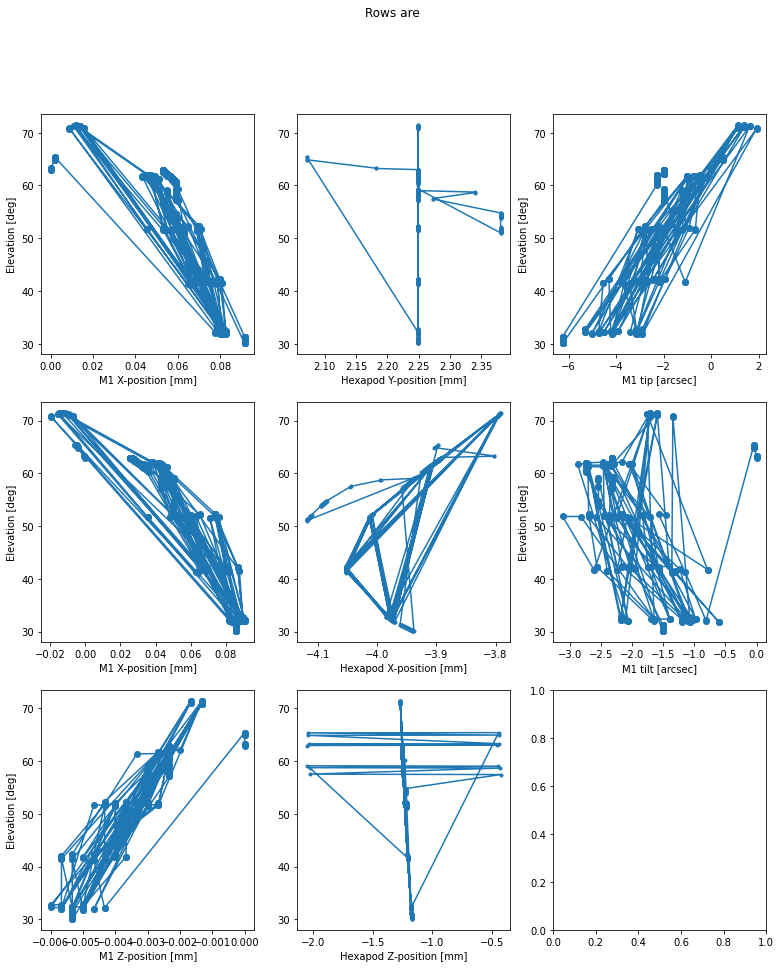

In [48]:
%matplotlib inline
nwide=3; nhigh=3
fig, (row1,row2,row3) = plt.subplots(nhigh, nwide, figsize=(nwide+fig_width, nhigh*fig_height))
fig.suptitle('Rows are')
xvals = (df4.m1_x_pos) # um
yvals = df4.el

row1[0].plot(xvals, yvals, 'o-')
row1[0].set_ylabel('Elevation [deg]')
row1[0].set_xlabel('M1 X-position [mm]')

xvals=df4.y
row1[1].plot(xvals,yvals, '.-')
row1[1].set_xlabel('Hexapod Y-position [mm]')


xvals = (df4.m1_tip) # um
row1[2].plot(xvals, yvals, 'o-')
row1[2].set_ylabel('Elevation [deg]')
row1[2].set_xlabel('M1 tip [arcsec]')


xvals = (df4.m1_y_pos) # mm
row2[0].plot(xvals, yvals, 'o-')
row2[0].set_ylabel('Elevation [deg]')
row2[0].set_xlabel('M1 X-position [mm]')

xvals=df4.x
row2[1].plot(xvals,yvals, '.-')
row2[1].set_xlabel('Hexapod X-position [mm]')

xvals = (df4.m1_tilt) # um
row2[2].plot(xvals, yvals, 'o-')
row2[2].set_ylabel('Elevation [deg]')
row2[2].set_xlabel('M1 tilt [arcsec]')

xvals = (df4.m1_piston) # mm
row3[0].plot(xvals, yvals, 'o-')
row3[0].set_ylabel('Elevation [deg]')
row3[0].set_xlabel('M1 Z-position [mm]')

xvals=df4.z
row3[1].plot(xvals,yvals, '.-')
row3[1].set_xlabel('Hexapod Z-position [mm]')
